In [24]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

from sklearn.svm import SVC


In [2]:
from sklearn.inspection import DecisionBoundaryDisplay

In [3]:
classifier = SVC(kernel="linear", C=0.025)

In [4]:
dataset = make_moons(noise=0.3, random_state=0),

In [5]:
y = dataset[0][1]

In [6]:
X = dataset[0][0]

In [7]:
print(X[:10])

[[ 0.03159499  0.98698776]
 [ 2.11509784 -0.04624397]
 [ 0.88248972 -0.07575606]
 [-0.0551441  -0.03733246]
 [ 0.82954503 -0.53932149]
 [ 2.11285708  0.66208353]
 [ 0.5696927   0.33744136]
 [ 0.95217454 -0.75307471]
 [-0.02922115  0.39287336]
 [ 1.71579557  0.36069454]]


In [8]:
X = StandardScaler().fit_transform(X)

In [9]:
print(X[:10])

[[-0.52880272  1.28542054]
 [ 1.82124821 -0.46607732]
 [ 0.43094924 -0.51610516]
 [-0.62663858 -0.45097084]
 [ 0.3712312  -1.30192489]
 [ 1.81872078  0.7346544 ]
 [ 0.07813527  0.18433247]
 [ 0.50954902 -1.66427178]
 [-0.59739923  0.27829883]
 [ 1.37086214  0.22375044]]


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)

In [11]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm


[]

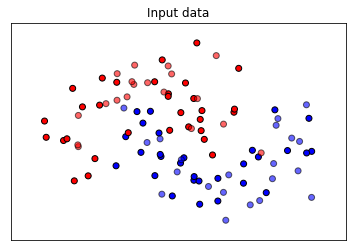

In [28]:
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(1, 1, 1)
    ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [29]:
classifier.fit(X_train, y_train)

SVC(C=0.025, kernel='linear')

In [30]:
score = classifier.score(X_test, y_test)

In [31]:
score

0.875

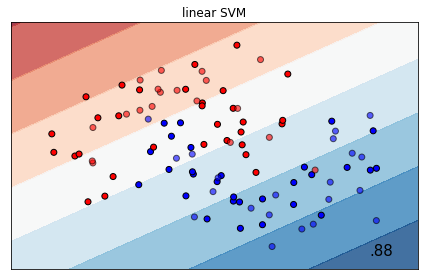

In [32]:

ax = plt.subplot(1,1,1)



DecisionBoundaryDisplay.from_estimator(classifier, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")


ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("linear SVM")


ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )


plt.tight_layout()
plt.show()

In [33]:
from sklearn.metrics import classification_report
import numpy as np

In [36]:
report = classification_report(y_test, classifier.predict(X_test),target_names=['class_1', 'class_2'] )

In [37]:
print(report)

              precision    recall  f1-score   support

     class_1       0.85      0.89      0.87        19
     class_2       0.90      0.86      0.88        21

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.88        40



In [38]:
from sklearn.metrics import precision_recall_curve

In [77]:
y_true = y_test

In [78]:
len(y_true)

40

In [41]:
y_scores = classifier.decision_function(X_test)

In [83]:
from sklearn.metrics import PrecisionRecallDisplay

In [85]:
from sklearn.metrics import average_precision_score

In [86]:
average_precision_score(y_test, classifier.predict(X_test))

0.8464285714285714

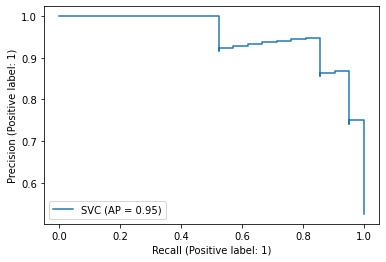

In [84]:
PrecisionRecallDisplay.from_estimator(classifier, X_test, y_true)

In [ ]:
from sklearn.metrics import roc_auc_score

In [104]:
print(roc_auc_score( y_true, classifier.decision_function(X_test)))

0.949874686716792


In [ ]:
from sklearn.metrics import RocCurveDisplay

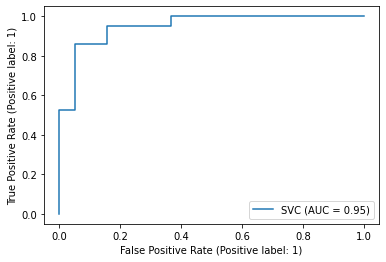

In [91]:
RocCurveDisplay.from_estimator(classifier, X_test, y_true)

In [105]:
from sklearn.metrics import DetCurveDisplay

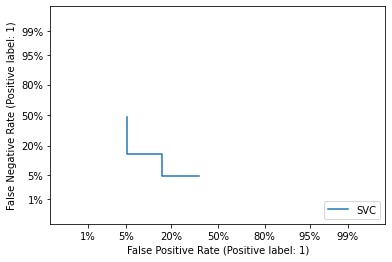

In [107]:
DetCurveDisplay.from_estimator(classifier, X_test, y_true)

In [110]:
from sklearn.metrics import balanced_accuracy_score

In [123]:
print(balanced_accuracy_score( y_true, classifier.predict(X_test) ))

0.8759398496240601


In [124]:
from sklearn.metrics import cohen_kappa_score

In [125]:
print(cohen_kappa_score( y_true, classifier.predict(X_test) ))

0.75


In [126]:
from sklearn.metrics import hinge_loss

In [127]:
print(hinge_loss( y_true, classifier.predict(X_test) ))

0.6
